## NYC Restaurants

In [2]:
# Setting up file for analysis
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

# Read file into dataframe
df = pd.read_csv("NYC_Restaurants.csv", dtype=unicode, index_col = 0)
df.head()

Populating the interactive namespace from numpy and matplotlib


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection
3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection
4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection


### [Q1, 7 points] Create a unique name for each restaurant
On the
DataFrame created above, add a new column to your DataFrame, called
’RESTAURANT’, that combines DBA, BUILDING, STREET, and ZIPCODE
fields. For example, “WENDY’S 469 FLATBUSH AVENUE 11225”.
Print the first 10 values of the RESTAURANT column of your DataFrame

Approach: Created a new column in dataframe by adding together values from DBA, Building, Street and Zipcode with spaces in between

In [5]:
df['RESTAURANT'] = df['DBA'] + " " + df['BUILDING'] + " " + df['STREET'] + " " + df['ZIPCODE']
df['RESTAURANT'].head(10)

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

### [Q2, 7 points] How many restaurants are included in the data?
Careful now:
• A “Subway” in one particular address (i.e., building, street, zipcode,
and boro) counts as one restaurant; don’t combine all Subways into
one restaurant!
• The data can have multiple violations for the same restaurant!

Approach: Dropped duplicate rows from dataset based on 'Restaurant'. Print length of dataframe for total number of restaurants

In [6]:
df_restaurants = df.drop_duplicates(subset = 'RESTAURANT')
print "There are", len(df_restaurants), "restaurants in the data."

There are 10114 restaurants in the data.


### [Q3, 7 points] How many chains are there?
Let us define a chain to be the same restaurant name occurring in at least two different (building,
street, zipcode) addresses.

Approach: Select all chains by value counts of "DBA" that are greater than 1. Create series with chain name and count of restaurants of that chain.

In [7]:
chains_mask = df_restaurants['DBA'].value_counts()
chains = chains_mask.loc[chains_mask > 1]
print "There are", len(chains), "unique chains in the data."
print "There are", chains.sum(), "total restaurants that are chains in the data."

There are 368 unique chains in the data.
There are 1666 total restaurants that are chains in the data.


### [Q4, 7 points] Plot a bar graph of the top 20 most popular chains.
We already have the chains from the previous problem.

Approach: Plot the top 20 chains from the series above. Series is already sorted by values.

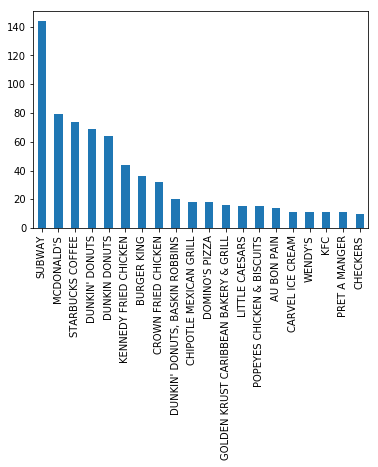

In [8]:
top_20_chains = chains[:20]
top_20_chains.plot(kind = 'bar')

### [Q5, 7 points] What fraction of all restaurants are chains?

Approach: Divide the number of restaurants that are chains by the number of total restaurants

In [9]:
chains_count = chains.sum()
all_restaurants_count = len(df_restaurants)
print ("{0:.2f}".format(round(float(chains_count) / float(all_restaurants_count)*100,2))), "% of all restaurants are chains"

16.47 % of all restaurants are chains


### [Q6, 7 points] Plot the number of non-chain restaurants in each boro.
First, we need to figure out all the non-chain restaurants, then select
out only those restaurants, and finally plot the number of such restaurants
by boro. Make sure to look at the plot; we don’t want to see... oh... the
“missing” boro.

Approach: Find all non-chain restaurants by applying the chains_mask where the value was equal to 1 (more than 1 would mean it was a chain). Using a list of non-chains from the index, look up all the non-chain restaurants in the deduped restaurant dataframe. Then make a DataFrame of the value counts of restaurants by BORO and drop 'Missing'.

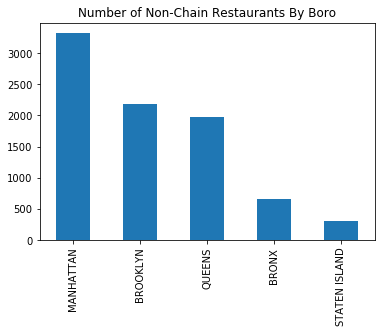

In [10]:
non_chain = chains_mask.loc[chains_mask == 1]
non_chain_list = non_chain.index.tolist()
non_chain_df = df_restaurants.loc[df_restaurants['DBA'].isin(non_chain_list)]

boro_df = pd.DataFrame()
boro_df['NON_CHAIN'] = non_chain_df['BORO'].value_counts()
boro_df = boro_df.drop(['Missing'])
boro_df['NON_CHAIN'].plot(kind = 'bar', title = "Number of Non-Chain Restaurants By Boro")

### [Q7, 10 points] Plot the fraction of non-chain restaurants in each boro. 
The boro with the most non-chain restaurants might just be the
boro with the most restaurants in general. If we want to find the boro that
attracts the most “independent” restauranteurs, we must divide the number
of non-chain restaurants by the total number of restaurants in the boro. Plot
this.
Is the boro with the most independent restaurants also the one with the
highest ratio of independent restaurants?

Approach: Find the total number of restaurants in each BORO, drop missing, and add to BORO dataframe. Then calculate the percentage of non-chain restaurants/total resaurants and add a new column called 'PERC_NON_CHAIN'

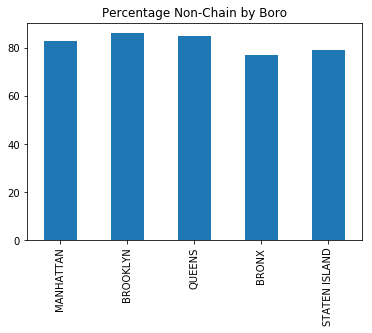

In [11]:
# Find total restaurants
total_rest = df_restaurants['BORO'].value_counts().drop('Missing')
boro_df['TOTAL_REST'] = total_rest

boro_df['PERC_NON_CHAIN'] = boro_df['NON_CHAIN'] / boro_df['TOTAL_REST'] * 100
boro_df['PERC_NON_CHAIN'].plot(kind = 'bar', title = "Percentage Non-Chain by Boro")

### [Q8, 7 points] Plot the popularity of cuisines. 
Which cuisines are the most well-represented among all restaurants? Plot the popularity of the top
20 cuisines. Again, be careful in your counting: remember that the same
restaurant can have multiple violations!

Approach: Plot the value counts of cuisines from the restaurant dataframe

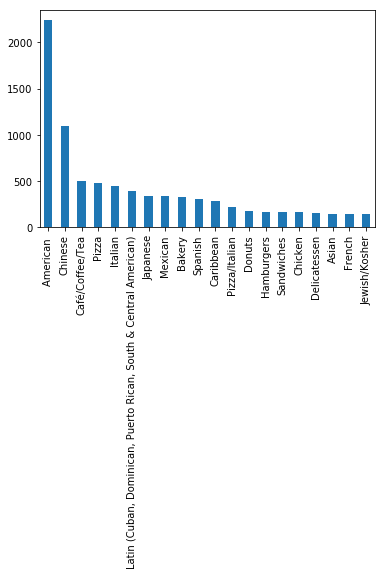

In [12]:
cuisine_series = df_restaurants['CUISINE DESCRIPTION'].value_counts()
top_20_cuisine_series = cuisine_series[:20]
top_20_cuisine_series.plot(kind = 'bar')

### [Q9, 12 points] Plot the cuisines among restaurants which do not get cited for violations. 
Ideally, you should explore and see what happens
when there is no violation, but here I will just tell you: the ’VIOLATION
CODE’ field is missing.
• Select only the ’RESTAURANT’ and ’CUISINE DESCRIPTION’ columns
of the DataFrame (we created the ’RESTAURANT’ field in an earlier
question).
• Select the instances where a restaurant did not get cited.
• Among these instances, how frequent is each of the cuisines?
Plot the frequencies of the top-20 among these cuisines.

Approach: Fill all empty violation codes with -1, then create a mask to select the rows with -1. Then select all the restaurants with no violations and plot based on value counts of cuisine descriptions.

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


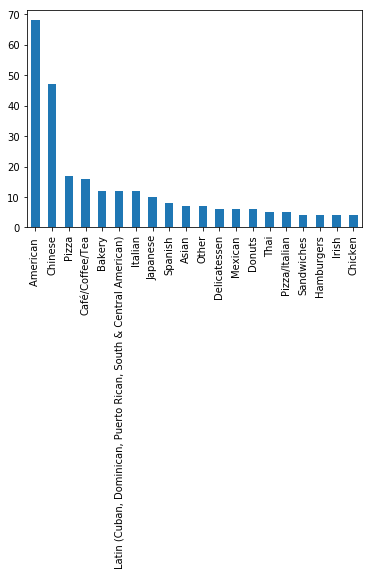

In [13]:
no_viol_mask = df['VIOLATION CODE'].fillna(-1)
no_viol_mask = (no_viol_mask == -1)
no_viol_df = df_restaurants[no_viol_mask]
no_viol_cuisine = no_viol_df['CUISINE DESCRIPTION'].value_counts()
no_viol_cuisine[:20].plot(kind = 'bar')

### [Q10, 7 points] What cuisines tend to be the “cleanest”?
• Select all cuisines for which there were at least 20 inspections of restaurants
representing that cuisine.
• For each such cuisine, compute the ratio of inspections that found no
violations to the total number of inspections. (This is just the ratio of
counts in the previous two questions.)
• Find the top-10 cuisines with the highest ratios; these are that cuisines
whose restaurants are “most likely to be clean.” (Hint: Check out the
“sort values” method for Series).

Approach: Create a new dataframe with the number of restaurants with no violations per cuisine, and the total number of cuisines, then calculate the ratio of the two. Plot that ratio.

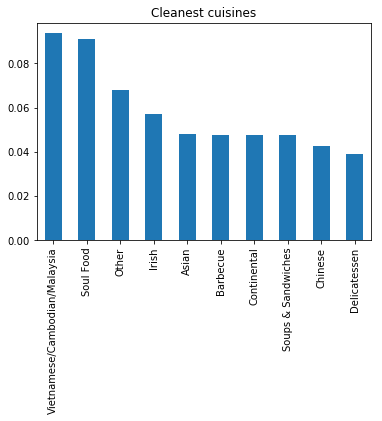

In [14]:
cuisines_viol_df = pd.DataFrame()
cuisines_viol_df['no_violations'] = no_viol_cuisine
mask_20_inspections = cuisine_series > 20
cuisines_viol_df['total_cuisine_count'] = cuisine_series[mask_20_inspections]
cuisines_viol_df = cuisines_viol_df.dropna()

cuisines_viol_df['clean_to_total_ratio'] = cuisines_viol_df['no_violations'] / cuisines_viol_df['total_cuisine_count']
cuisines_viol_df = cuisines_viol_df.sort_values(by = 'clean_to_total_ratio', ascending = False)

cuisines_viol_df[:10]['clean_to_total_ratio'].plot(kind = 'bar', title = "Cleanest cuisines")

### [Q11, 10 points] What are the most common violations in each borough? 
Create a table of the number of times each violation description
was observed in each borough, and figure out the most common violation
description for each borough.
To create the table, there are two possibilities:
• You can create a dummy column, fill it with just the number 1, and
create the table using a command we have seen in class (Hint: we will
want aggfunc=sum).
• Alternatively, you can look up the function crosstab which does this
counting by default.
Once you do have the table, you will still need to find the most common
violation description for each borough.

Approach: Select BORO and Violation Description for the original dataframe. Then create a crosstabs on violations by boro based on description. Then, find the most frequent violation by boro.

In [15]:
violations_by_boro = df[['BORO','VIOLATION DESCRIPTION']]
# Drop "Missing" Violations
violations_by_boro = violations_by_boro[violations_by_boro['BORO'] != "Missing"]
viol_crosstab = pd.crosstab(violations_by_boro['VIOLATION DESCRIPTION'], violations_by_boro['BORO'], margins = True)
viol_crosstab

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,All
VIOLATION DESCRIPTION,,,,,,
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",12,40,49,29,5,135
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,1,5,6,4,1,17
''''Wash hands sign not posted at hand wash facility.,21,57,93,60,8,239
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",5,12,19,24,3,63
Accurate thermometer not provided in refrigerated or hot holding equipment.,21,76,98,92,16,303
"Appropriately scaled metal stem-type thermometer or thermocouple not provided or used to evaluate temperatures of potentially hazardous foods during cooking, cooling, reheating and holding.",27,120,162,85,17,411
Ashtray present in smoke-free area.,4,4,5,8,1,22
"Bulb not shielded or shatterproof, in areas where there is extreme heat, temperature changes, or where accidental contact may occur.",20,93,168,80,10,371
"Caloric content not posted on menus, menu boards or food tags, in a food service establishment that is 1 of 15 or more outlets operating the same type of business nationally under common ownership or control, or as a franchise or doing business under the same name, for each menu item that is served in portions, the size and content of which are standardized.",0,4,6,5,1,16


In [16]:
print "BRONX: ", "\n", viol_crosstab['BRONX'].drop('All').idxmax(), "\n", viol_crosstab['BRONX'].drop('All').max(), "occurrences", "\n"
print "BROOKLYN: ", "\n", viol_crosstab['BROOKLYN'].drop('All').idxmax(), "\n", viol_crosstab['BROOKLYN'].drop('All').max(), "occurrences", "\n"
print "MANHATTAN: ", "\n", viol_crosstab['MANHATTAN'].drop('All').idxmax(), "\n", viol_crosstab['MANHATTAN'].drop('All').max(), "occurrences", "\n"
print "QUEENS: ", "\n", viol_crosstab['QUEENS'].drop('All').idxmax(), "\n", viol_crosstab['QUEENS'].drop('All').max(), "occurrences", "\n"
print "STATEN ISLAND: ", "\n", viol_crosstab['STATEN ISLAND'].drop('All').idxmax(), "\n", viol_crosstab['STATEN ISLAND'].drop('All').max(), "occurrences", "\n"

BRONX:  
Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit. 
500 occurrences 

BROOKLYN:  
Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit. 
1485 occurrences 

MANHATTAN:  
Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit. 
2417 occurrences 

QUEENS:  
Non-food contact surface improperly constructed. Unacceptable material used. Non-

### [Q12, 12 points] What are the most common violations per borough, after normalizing for the relative abundance of each violation?
Hopefully, the answer to the previous question left you unsatisfied,
because some violations are just very common, irrespective of borough. A
better approach would be to normalize the violation counts, as follows.
• Get overall frequencies: Figure out how common each violation is, over
the entire dataset; let’s call this violationFrequency.
• Normalize: Consider the table of number of violations by boro that
you created for the previous question. For each borough, divide the
number of violations of each type by the total number of violations for
that type; i.e., divide the series of violations by violationFrequency.
We want to do this for each borough.
• Find the biggest violations: Now, after this normalization, for each
borough, figure out the most common violation description.

Approach: First, find the overall violation freqencies to calculate the normalized occurance of violations. Then for each BORO, create a new column that divides the count for that violation by BORO by the violation frequency. Then, for each BORO, find the violation with the highest normalized frequency using max and idxmax.

In [17]:
violationFrequency = df['VIOLATION DESCRIPTION'].value_counts()
viol_crosstab['violationFrequency'] = violationFrequency
viol_crosstab['BRONX_NORM'] = viol_crosstab['BRONX'] / viol_crosstab['violationFrequency']
viol_crosstab['BROOKLYN_NORM'] = viol_crosstab['BROOKLYN'] / viol_crosstab['violationFrequency']
viol_crosstab['MANHATTAN_NORM'] = viol_crosstab['MANHATTAN'] / viol_crosstab['violationFrequency']
viol_crosstab['QUEENS_NORM'] = viol_crosstab['QUEENS'] / viol_crosstab['violationFrequency']
viol_crosstab['STATEN_ISLAND_NORM'] = viol_crosstab['STATEN ISLAND'] / viol_crosstab['violationFrequency']

print "BRONX: ", "\n", viol_crosstab['BRONX_NORM'].drop('All').idxmax(), "\n", viol_crosstab['BRONX'].drop('All').max(), "occurrences", "\n"
print "BROOKLYN: ", "\n", viol_crosstab['BROOKLYN_NORM'].drop('All').idxmax(), "\n", viol_crosstab['BROOKLYN'].drop('All').max(), "occurrences", "\n"
print "MANHATTAN: ", "\n", viol_crosstab['MANHATTAN_NORM'].drop('All').idxmax(), "\n", viol_crosstab['MANHATTAN'].drop('All').max(), "occurrences", "\n"
print "QUEENS: ", "\n", viol_crosstab['QUEENS_NORM'].drop('All').idxmax(), "\n", viol_crosstab['QUEENS'].drop('All').max(), "occurrences", "\n"
print "STATEN ISLAND: ", "\n", viol_crosstab['STATEN_ISLAND_NORM'].drop('All').idxmax(), "\n", viol_crosstab['STATEN ISLAND'].drop('All').max(), "occurrences", "\n"

BRONX:  
Unprotected food re-served. 
500 occurrences 

BROOKLYN:  
Precooked potentially hazardous food from commercial food processing establishment that is supposed to be heated, but is not heated to 140º F within 2 hours. 
1485 occurrences 

MANHATTAN:  
Out-of package sale of tobacco products observed. 
2417 occurrences 

QUEENS:  
Caloric content range (minimum to maximum) not posted on menus and or menu boards for each flavor, variety and size of each menu item that is offered for sale in different flavors, varieties and sizes. 
1416 occurrences 

STATEN ISLAND:  
Eggs found dirty/cracked; liquid, frozen or powdered eggs not pasteurized. 
230 occurrences 

